# Standerd Scalling
Standerd Scalling convert the data to the range of -3 to 3.

In [1]:
# import libreaies
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# create a dataset
data = {
    'age':[25,30,35,40,45],
    'weight':[50,60,65,70,80],
    'height':[150,170,180,190,200]
}
# convert the data into datafrsme
df = pd.DataFrame(data)

In [3]:
df.head()

,age,weight,height
0,25,50,150
1,30,60,170
2,35,65,180
3,40,70,190
4,45,80,200


In [4]:
# import the scaller
scaller = StandardScaler()
# fit the scaller
scalled_data = scaller.fit_transform(df)
scalled_data

array([[-1.41421356, -1.5       , -1.62746694],
       [-0.70710678, -0.5       , -0.46499055],
       [ 0.        ,  0.        ,  0.11624764],
       [ 0.70710678,  0.5       ,  0.69748583],
       [ 1.41421356,  1.5       ,  1.27872403]])

# Min Max Scaller

In [5]:
# import libreaies
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [6]:
# create a dataset
data = {
    'age':[25,30,35,40,45],
    'weight':[50,60,65,70,80],
    'height':[150,170,180,190,200]
}
# convert the data into datafrsme
df = pd.DataFrame(data)

In [7]:
# import the scaller
scaller = MinMaxScaler()
# fit the scaller
scalled_data = scaller.fit_transform(df)
scalled_data

array([[0.        , 0.        , 0.        ],
       [0.25      , 0.33333333, 0.4       ],
       [0.5       , 0.5       , 0.6       ],
       [0.75      , 0.66666667, 0.8       ],
       [1.        , 1.        , 1.        ]])

In [8]:
# converting the array into dataframe
at = pd.DataFrame(scalled_data)
at.head()

,0,1,2
0,0.00,0.000000,0.0
1,0.25,0.333333,0.4
2,0.50,0.500000,0.6
3,0.75,0.666667,0.8
4,1.00,1.000000,1.0


----
# Transfromation of Nan Parametrica Data (Not Normal Distribution)

In [9]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# create non not narmal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000,scale=2)
df = pd.DataFrame(df,columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

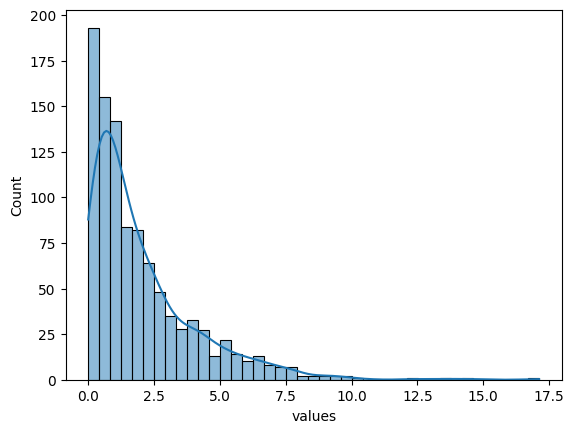

In [11]:
# making thr histplot to check the distribution
sns.histplot(df['values'],kde=True)

## Here the data in not in normal form to make it normal we will use the power transformation from sklearn lib.

In [12]:
# call the transformer from sklearn lib
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
# here splitting the transfromer into two categories
pt_boxcox = PowerTransformer(method='box-cox')
pt_quantile = QuantileTransformer(output_distribution='normal')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')

# boxcox k lye data must be postive
df['Box_cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quntile'] = pt_quantile.fit_transform(df[['values']])

In [13]:
df.head()

,values,Box_cox,Yeo_Johnson,Quntile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


### The above we can see that the data is converted from high range to a lower range

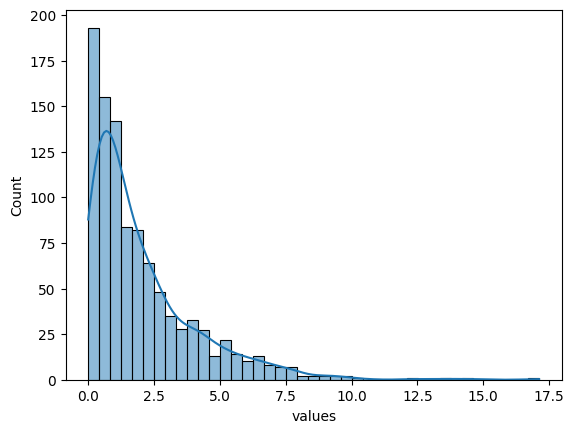

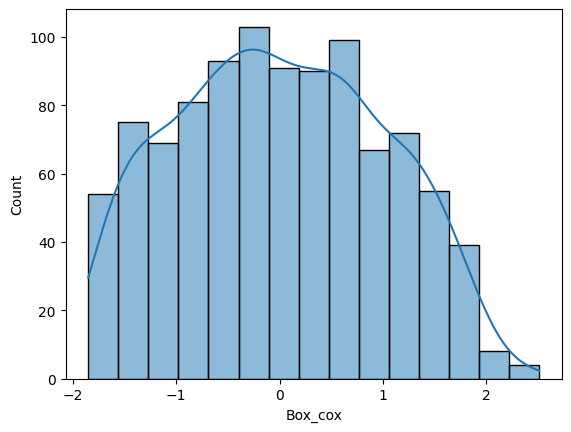

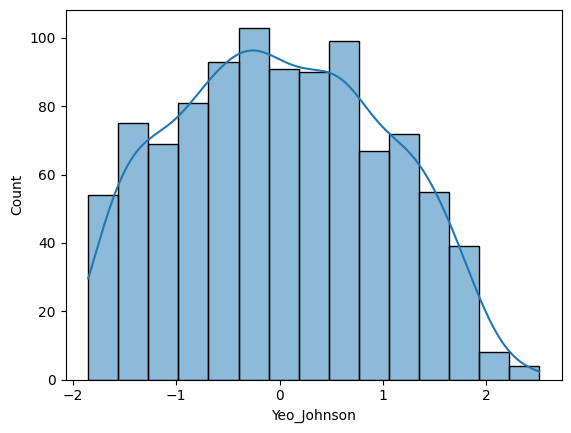

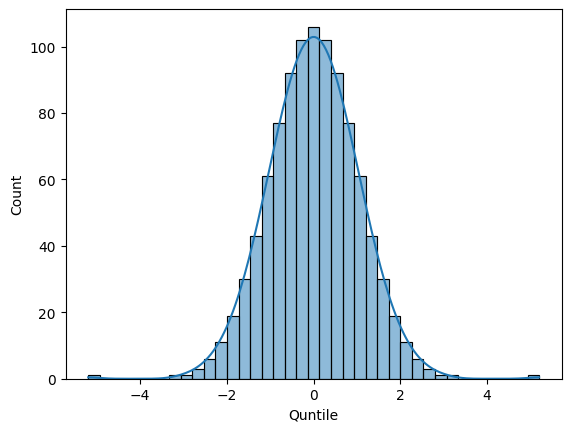

In [14]:
# here making hitogram for all columns using for loop
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

---
# Normalization
## Two Methods
1 - L1 Normalizer

2  - L2 Normalizer

# L2 Normalization
Rescale each sample (row) to have unit norm.this type of normalization is often used when dealing with text data.
the l2 normalization is calculated as the square root of the sum of the square vector values.

In [15]:
# using l2 normalizer from sklearn lib
from sklearn.preprocessing import Normalizer
data = [[1,1,1],[1,1,0],[1,0,0]]
Normalizer = Normalizer(norm='l2')
print(Normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization
Also rescale each sample (row) by differnt approch,snsuring the sum of the absoute value is 1 in each row.
the l1 normalization is calculated as the sum of the absulte vocter values.

In [16]:
# using l1 normalizer from sklearn lib
from sklearn.preprocessing import Normalizer
data = [[1,1,1],[1,1,0],[1,0,0]]
Normalizer = Normalizer(norm='l1')
print(Normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]
